# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


    


Beginning Data Retrieval     
-----------------------------


In [4]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    #pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | emerald
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | umluj
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | puerto aysen
Processing Record 12 of Set 1 | oranjemund
Processing Record 13 of Set 1 | porto novo
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | novo aripuana
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | corumba
Processing Record 19 of Set 1 | fukuecho
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | taiohae
City not found. Skipping...
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"],unit="s")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,21.38,74,11,11.67,MU,2024-09-16 16:44:36
1,emerald,-23.5333,148.1667,15.19,61,18,2.88,AU,2024-09-16 16:51:24
2,wailua homesteads,22.0669,-159.3780,25.44,88,75,5.66,US,2024-09-16 16:51:25
3,puerto ayora,-0.7393,-90.3518,21.97,91,91,2.68,EC,2024-09-16 16:51:26
4,port-aux-francais,-49.3500,70.2167,4.31,94,100,15.52,TF,2024-09-16 16:44:14


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,21.38,74,11,11.67,MU,2024-09-16 16:44:36
1,emerald,-23.5333,148.1667,15.19,61,18,2.88,AU,2024-09-16 16:51:24
2,wailua homesteads,22.0669,-159.3780,25.44,88,75,5.66,US,2024-09-16 16:51:25
3,puerto ayora,-0.7393,-90.3518,21.97,91,91,2.68,EC,2024-09-16 16:51:26
4,port-aux-francais,-49.3500,70.2167,4.31,94,100,15.52,TF,2024-09-16 16:44:14


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

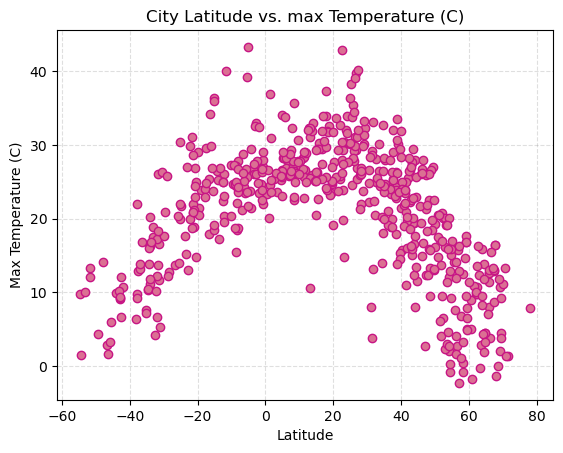

In [9]:
# Build scatter plot for latitude vs. temperature

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, c="palevioletred", edgecolors="mediumvioletred",zorder =2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. max Temperature (C)")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

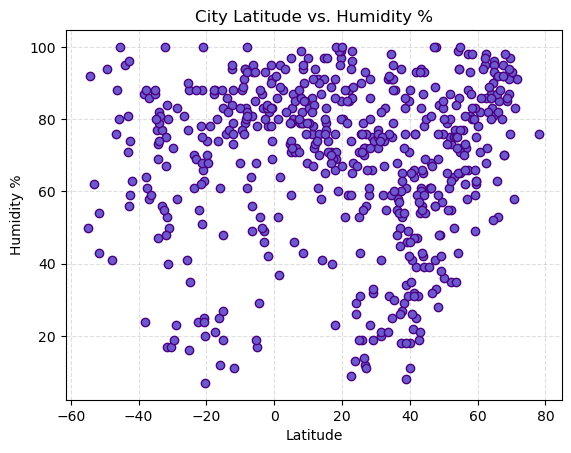

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, c="slateblue", edgecolors="indigo",zorder =2)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity %")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

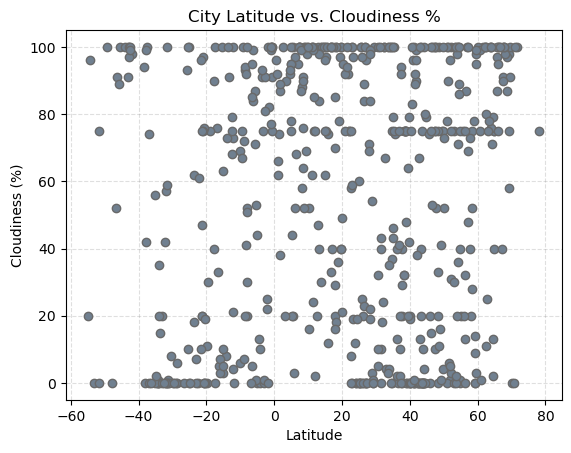

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, c="slategrey", edgecolors="dimgray",zorder =2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness %")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

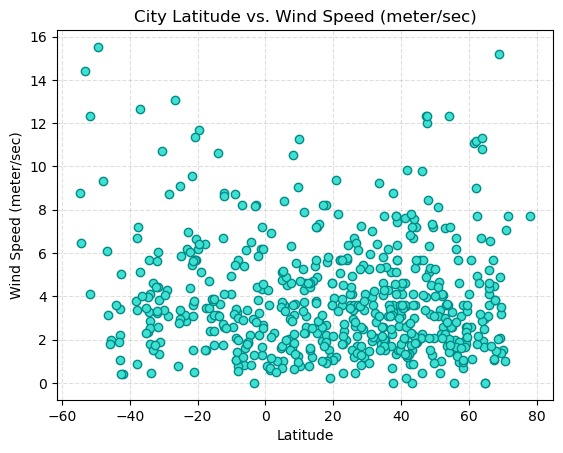

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, c="turquoise", edgecolors="darkcyan",zorder =2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.title("City Latitude vs. Wind Speed (meter/sec)")
plt.grid(linestyle='--', color='gray', alpha=0.25,zorder = 1)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression_plot(x,y,xlabel,ylabel,color):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rsquared = round(rvalue**2,3)
    plt.scatter(x, y,color=color)
    plt.plot(x,regress_values,"r-")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")

    xmin= x.min()
    ymin=y.min()
    plt.annotate(line_eq,(xmin,ymin),fontsize=12,color="firebrick")
    plt.show()
    print(f"The Line equation is: {line_eq}")
    print(f"The r-squared is: {rsquared}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,wailua homesteads,22.0669,-159.3780,25.44,88,75,5.66,US,2024-09-16 16:51:25
6,umluj,25.0213,37.2685,30.08,71,0,3.62,SA,2024-09-16 16:51:29
12,porto novo,6.4965,2.6036,27.90,72,68,4.54,BJ,2024-09-16 16:51:36
18,fukuecho,32.6881,128.8419,28.10,83,67,2.82,JP,2024-09-16 16:51:43
20,hawaiian paradise park,19.5933,-154.9731,24.73,97,100,4.63,US,2024-09-16 16:51:45


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,21.38,74,11,11.67,MU,2024-09-16 16:44:36
1,emerald,-23.5333,148.1667,15.19,61,18,2.88,AU,2024-09-16 16:51:24
3,puerto ayora,-0.7393,-90.3518,21.97,91,91,2.68,EC,2024-09-16 16:51:26
4,port-aux-francais,-49.3500,70.2167,4.31,94,100,15.52,TF,2024-09-16 16:44:14
5,bredasdorp,-34.5322,20.0403,10.34,77,0,2.36,ZA,2024-09-16 16:51:28


###  Temperature vs. Latitude Linear Regression Plot

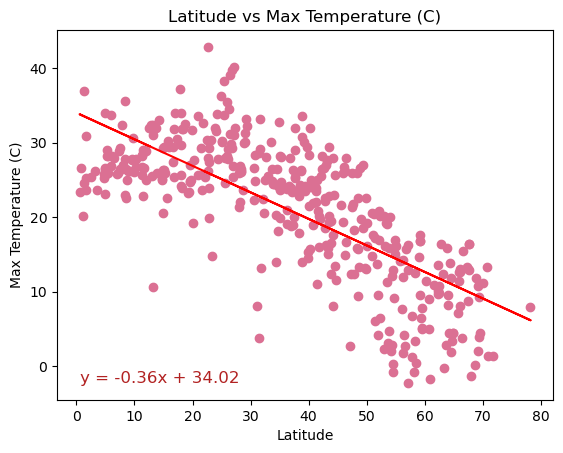

The Line equation is: y = -0.36x + 34.02
The r-squared is: 0.547


In [16]:
# Linear regression on Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Max Temp"]
northern_y_label = "Max Temperature (C)"
color="palevioletred"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label,color)

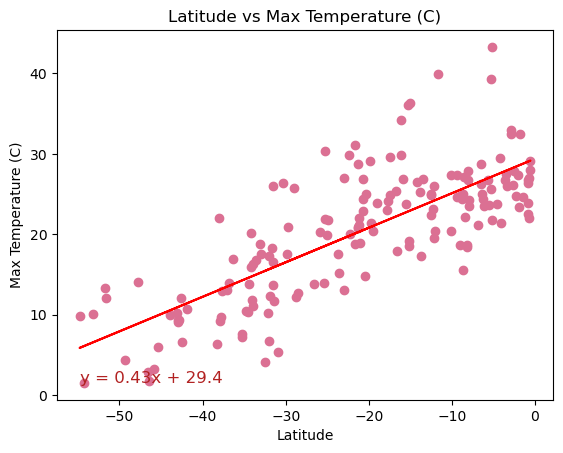

The Line equation is: y = 0.43x + 29.4
The r-squared is: 0.585


In [17]:
# Linear regression on Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Max Temp"]
southern_y_label = "Max Temperature (C)"
color="palevioletred"
regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label,color)

**Discussion about the linear relationship:**

From the data, we can see there is a moderate correlation between the latitude and the max temperature, this correlation seems to be a little stronger in the northern hemisphere

### Humidity vs. Latitude Linear Regression Plot

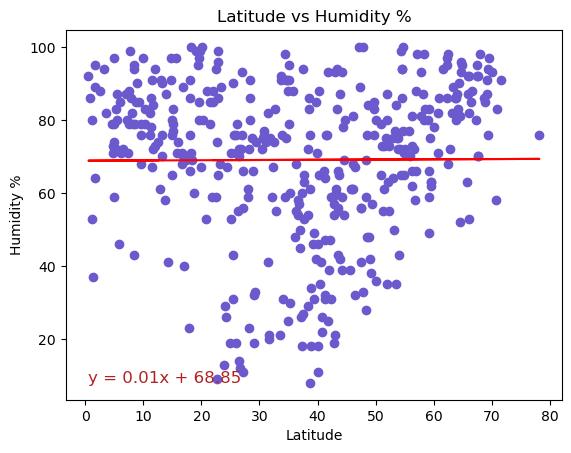

The Line equation is: y = 0.01x + 68.85
The r-squared is: 0.0


In [18]:
# Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Humidity"]
northern_y_label = "Humidity %"
color="slateblue"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label,color)


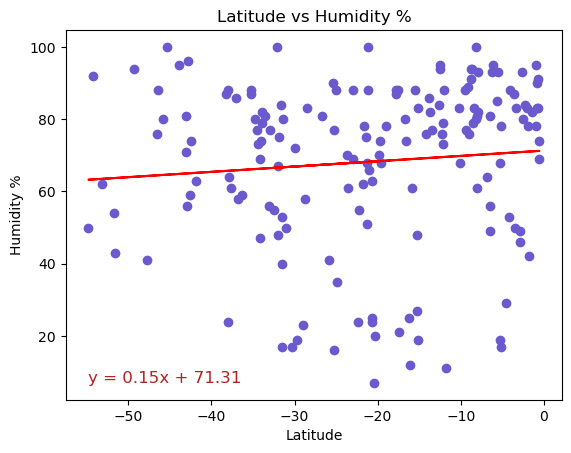

The Line equation is: y = 0.15x + 71.31
The r-squared is: 0.008


In [19]:
# Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Humidity"]
southern_y_label = "Humidity %"
color="slateblue"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label,color)

**Discussion about the linear relationship:**

There’s no correlation between the latitude and humidity for either hemispheres. Humidity values seem to concentrate more around the higher percentages but there is till a lot of variance regardless of the latitude.


### Cloudiness vs. Latitude Linear Regression Plot

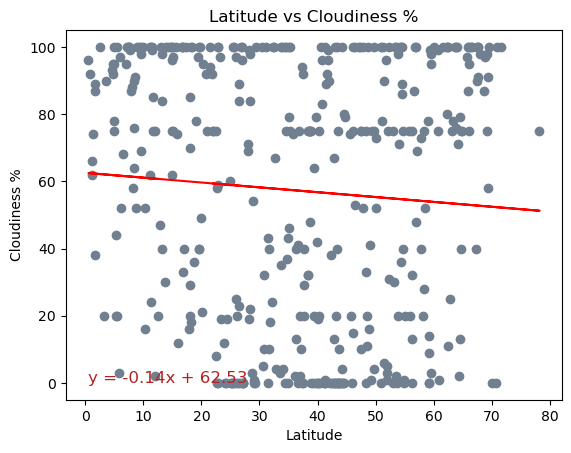

The Line equation is: y = -0.14x + 62.53
The r-squared is: 0.005


In [20]:
# Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Cloudiness"]
northern_y_label = "Cloudiness %"
color="slategrey"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label,color)

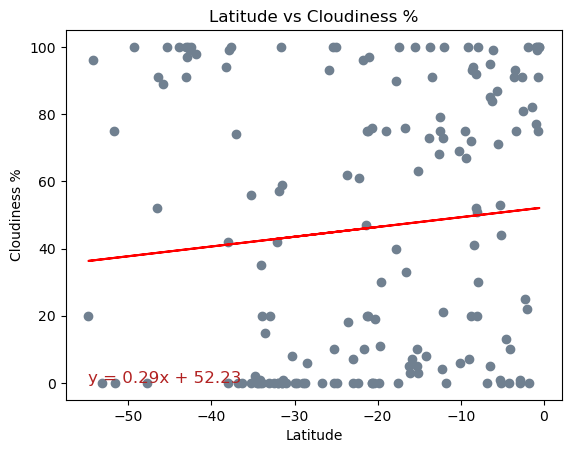

The Line equation is: y = 0.29x + 52.23
The r-squared is: 0.011


In [21]:
# Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Cloudiness"]
southern_y_label = "Cloudiness %"
color="slategrey"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label,color)

**Discussion about the linear relationship:** 
There’s no correlation between the latitude and cloudiness for either hemispheres. Values seem to concentrate more towards the extreme values, 0% or 100% all across latitudes in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

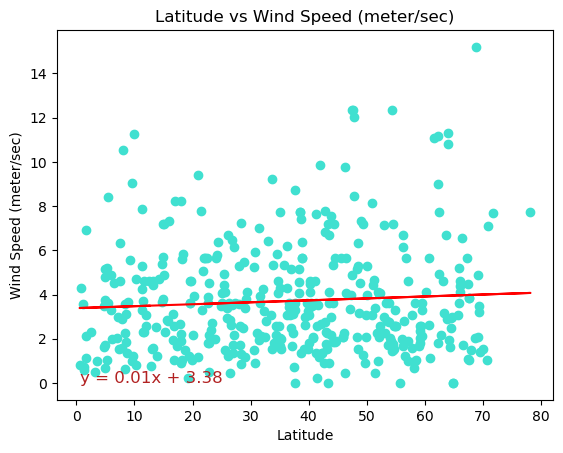

The Line equation is: y = 0.01x + 3.38
The r-squared is: 0.005


In [22]:
# Northern Hemisphere
northern_x_axis = northern_hemi_df["Lat"]
northern_x_label = "Latitude"
northern_y_axis = northern_hemi_df["Wind Speed"]
northern_y_label = "Wind Speed (meter/sec)"
color="turquoise"

regression_plot(northern_x_axis,northern_y_axis,northern_x_label,northern_y_label,color)

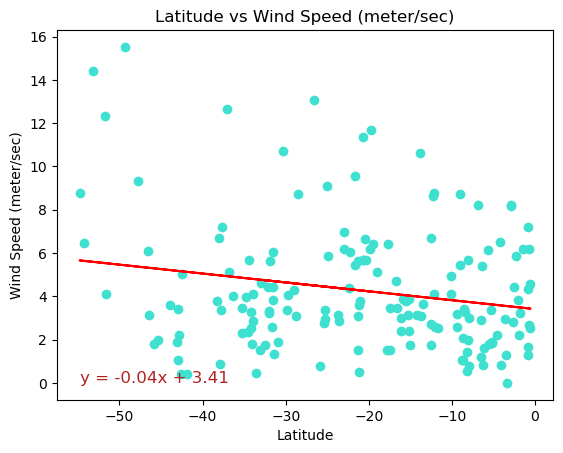

The Line equation is: y = -0.04x + 3.41
The r-squared is: 0.041


In [23]:
# Southern Hemisphere
southern_x_axis = southern_hemi_df["Lat"]
southern_x_label = "Latitude"
southern_y_axis = southern_hemi_df["Wind Speed"]
southern_y_label = "Wind Speed (meter/sec)"
color="turquoise"

regression_plot(southern_x_axis,southern_y_axis,southern_x_label,southern_y_label,color)

**Discussion about the linear relationship:** There’s no correlation between the latitude and cloudiness for either hemispheres.
Wind Speed values are very similar for all latitudes.